<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

**Import data**

Please load the dataset in the current folder

In [ ]:
data = pd.read_csv('2.iris.csv')

**Settings**

In [ ]:
sns.set(style="whitegrid")

**Plot**

Please specify appropriate:
- Figure size
- Plot type (scatterplot, lineplot, boxplot, histplot, barplot, heattmap)
- Axes name
- Legend
- Font size for all writings

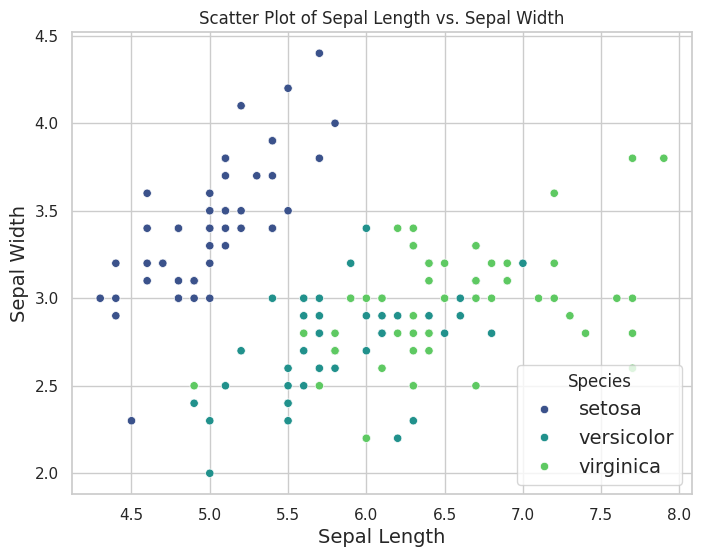

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', palette='viridis')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.legend(title='Species',fontsize=14)
plt.show()

**1. Describe the dataset: how many items? how many variables? how many classes (if any)?**

In [ ]:
n_items = data.shape[0]
n_variables = data.shape[1]-1
n_classes = len(set(data.species))

print(f"Number of items: {n_items}")
print(f"Number of variables: {n_variables}")
print(f"Number of classes: {n_classes}")

Number of items: 150
Number of variables: 4
Number of classes: 3


**2. What is the most represented class? Please choose an appropriate plot**

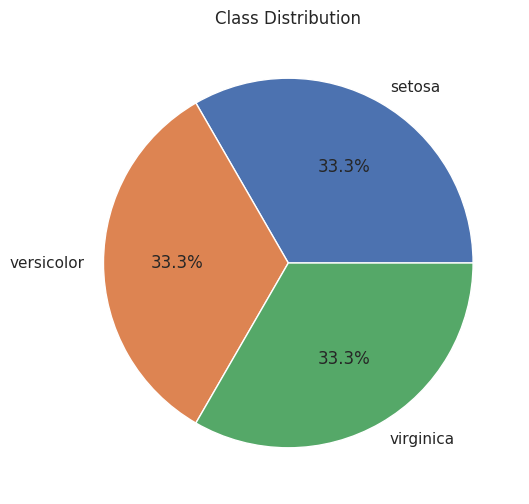

In [ ]:
class_distribution = data.iloc[:, -1].value_counts()

plt.figure(figsize=(8, 6))
#class_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.pie(class_distribution,labels=class_distribution.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

The three classes are equally represented.

**3. What is the distribution of each variable? Are the distributions different? Please choose the correct plot**

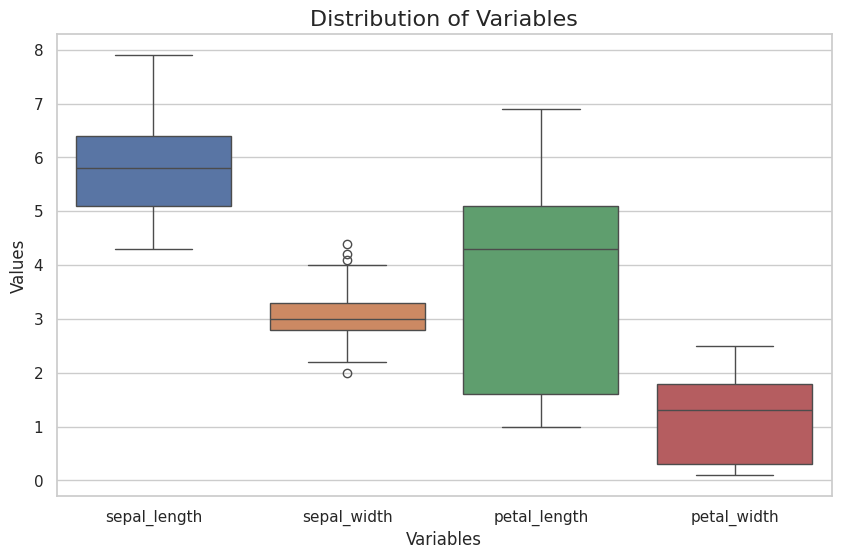

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[:][:-1])
plt.title('Distribution of Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

The distributions are different. Sepal length has the most large values, followed by petal length and petal with. The distribution of sepal width is very narrow and within the range of values of petal length.

**4. Is the distribution of each variable different for the different classes?**

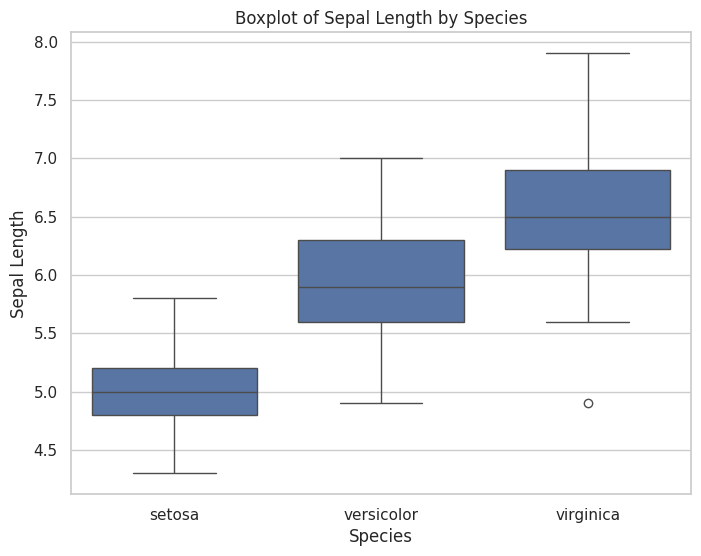

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='species', y='sepal_length')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

Values of sepal length are significantly different in the different classes. They increase moving from setosa to versicolor, to virginica.

**5. Is there any correlation between variables?**

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

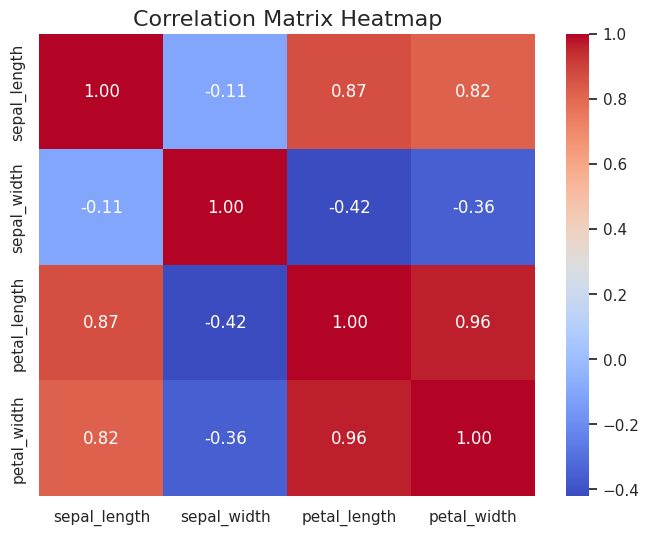

In [ ]:
correlation_matrix = data.iloc[:, :-1].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16)

It seems that Sepal length is strongly correlated with Petal length and Petal width. Let's verify using scatter plots

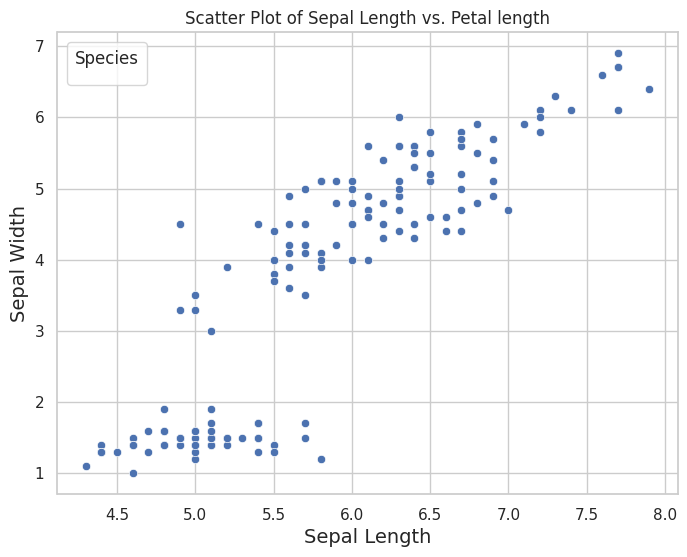

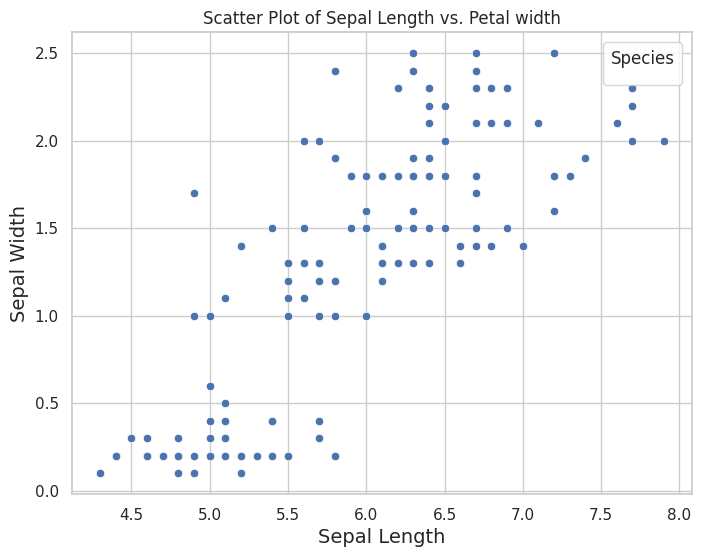

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='petal_length')
plt.title('Scatter Plot of Sepal Length vs. Petal length')
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.legend(title='Species',fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='petal_width')
plt.title('Scatter Plot of Sepal Length vs. Petal width')
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.legend(title='Species',fontsize=14)
plt.show()

**6. Compare the characteristics of some items inside the same class**

In [ ]:
subset = data.iloc[:3, :-1]
subset['Item'] = [f"Item {i+1}" for i in range(len(subset))]
radar_data = subset.melt(id_vars=['Item'], var_name='Variable', value_name='Value')
fig = px.line_polar(radar_data, r='Value', theta='Variable', color='Item', line_close=True, title="Radar Plot")
fig.show()




Items inside the same class have similar characteristics.

**7. Compare the characteristics of items from different classes**

In [ ]:
class_a = data[data.iloc[:, -1] == data.iloc[0, -1]].iloc[:2, :-1]  # First 2 items from Class A
class_b = data[data.iloc[:, -1] != data.iloc[0, -1]].iloc[:2, :-1]  # First 2 items from a different class

subset = pd.concat([class_a, class_b])
subset['Item'] = [f"Item {i+1}" for i, cls in enumerate(subset.iloc[:, -1])]
radar_data = subset.melt(id_vars=['Item'], var_name='Variable', value_name='Value')

fig = px.line_polar(radar_data, r='Value', theta='Variable', color='Item', line_close=True, title="Comparison Between Classes")
fig.show()
